In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Plant 2 : Generation Data

In [2]:
plant2 = pd.read_csv(
    'solar_data/Plant_2_Generation_Data.csv', low_memory=False)
plant2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [3]:
len(plant2.SOURCE_KEY.value_counts())

22

In [4]:
plant2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [5]:
plant2_sum = plant2.groupby('DATE_TIME')[
    ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].agg('sum')
plant2_sum.reset_index(inplace=True)
plant2_sum

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10
...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000,1.419408e+10
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000,1.419408e+10
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000,1.419408e+10
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000,1.419408e+10


### Cleaning Data

In [6]:
plant2_sum['DATE_TIME'] = pd.to_datetime(plant2_sum.DATE_TIME)
plant2_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3259 non-null   datetime64[ns]
 1   DC_POWER     3259 non-null   float64       
 2   AC_POWER     3259 non-null   float64       
 3   DAILY_YIELD  3259 non-null   float64       
 4   TOTAL_YIELD  3259 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 127.4 KB


In [7]:
plant2_sum['time'] = plant2_sum.DATE_TIME.dt.time
plant2_sum['date'] = plant2_sum.DATE_TIME.dt.date

In [8]:
plant2_sum

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time,date
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10,00:00:00,2020-05-15
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10,00:15:00,2020-05-15
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10,00:30:00,2020-05-15
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10,00:45:00,2020-05-15
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10,01:00:00,2020-05-15
...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000,1.419408e+10,22:45:00,2020-06-17
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000,1.419408e+10,23:00:00,2020-06-17
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000,1.419408e+10,23:15:00,2020-06-17
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000,1.419408e+10,23:30:00,2020-06-17


In [9]:
plant2_sum.groupby('date')['DC_POWER'].agg('sum')

date
2020-05-15    666607.630952
2020-05-16    566839.840000
2020-05-17    556236.918205
2020-05-18    530773.677143
2020-05-19    443495.847015
2020-05-20    352374.378810
2020-05-21    494112.260000
2020-05-22    498711.327619
2020-05-23    501823.294762
2020-05-24    479293.537143
2020-05-25    582787.339048
2020-05-26    576620.090952
2020-05-27    445436.748791
2020-05-28    499034.033004
2020-05-29    496059.248581
2020-05-30    614530.604762
2020-05-31    556847.645238
2020-06-01    372058.984597
2020-06-02    519491.964762
2020-06-03    414845.166190
2020-06-04    474970.407143
2020-06-05    518707.514762
2020-06-06    527117.054762
2020-06-07    473278.931905
2020-06-08    604333.864652
2020-06-09    554027.089048
2020-06-10    393589.770390
2020-06-11    342752.854139
2020-06-12    411233.862857
2020-06-13    455305.790476
2020-06-14    505911.451905
2020-06-15    410998.909524
2020-06-16    480810.068571
2020-06-17    380211.240476
Name: DC_POWER, dtype: float64

In [10]:
plant2_sum.drop(columns='DATE_TIME', axis=1, inplace=True)
plant2_sum

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time,date
0,0.0,0.0,48899.938095,1.418960e+10,00:00:00,2020-05-15
1,0.0,0.0,28401.000000,1.418960e+10,00:15:00,2020-05-15
2,0.0,0.0,28401.000000,1.418960e+10,00:30:00,2020-05-15
3,0.0,0.0,28401.000000,1.418960e+10,00:45:00,2020-05-15
4,0.0,0.0,26516.000000,1.418960e+10,01:00:00,2020-05-15
...,...,...,...,...,...,...
3254,0.0,0.0,93040.000000,1.419408e+10,22:45:00,2020-06-17
3255,0.0,0.0,93040.000000,1.419408e+10,23:00:00,2020-06-17
3256,0.0,0.0,93040.000000,1.419408e+10,23:15:00,2020-06-17
3257,0.0,0.0,93040.000000,1.419408e+10,23:30:00,2020-06-17


### DC Power

In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [12]:
plt.style.use(['ggplot'])

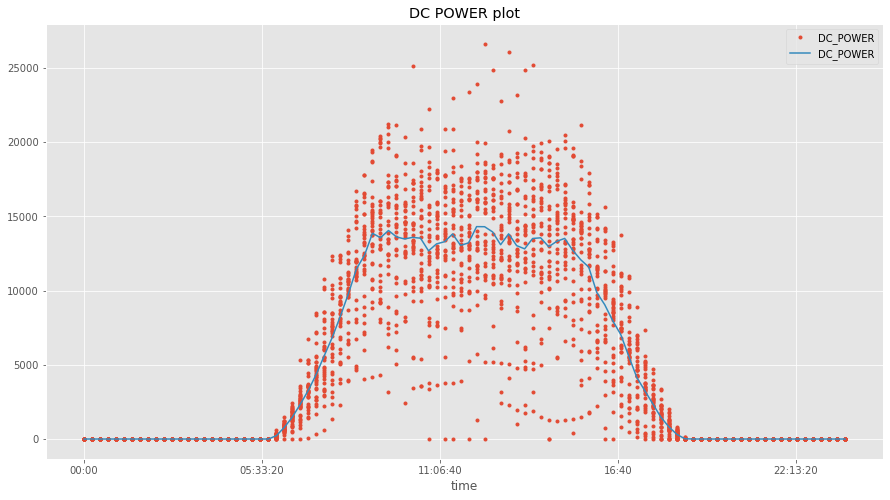

In [13]:
plant2_sum.plot(x='time', y='DC_POWER', style='.', figsize=(15, 8))
plant2_sum.groupby('time')['DC_POWER'].agg('mean').plot(legend=True)
plt.title('DC POWER plot')
plt.show()

In [14]:
calendar_dc = plant2_sum.pivot_table(
    values='DC_POWER', index='time', columns='date')
calendar_dc

date,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,...,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:15:00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def multi_plot(data=None, row=None, col=None, title='DC Power'):
    cols = data.columns  # take all column
    gp = plt.figure(figsize=(20, 20))

    gp.subplots_adjust(wspace=0.2, hspace=0.8)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row, col, i)
        data[cols[i-1]].plot(ax=ax, style='b.')
        ax.set_title('{} {}'.format(title, cols[i-1]))

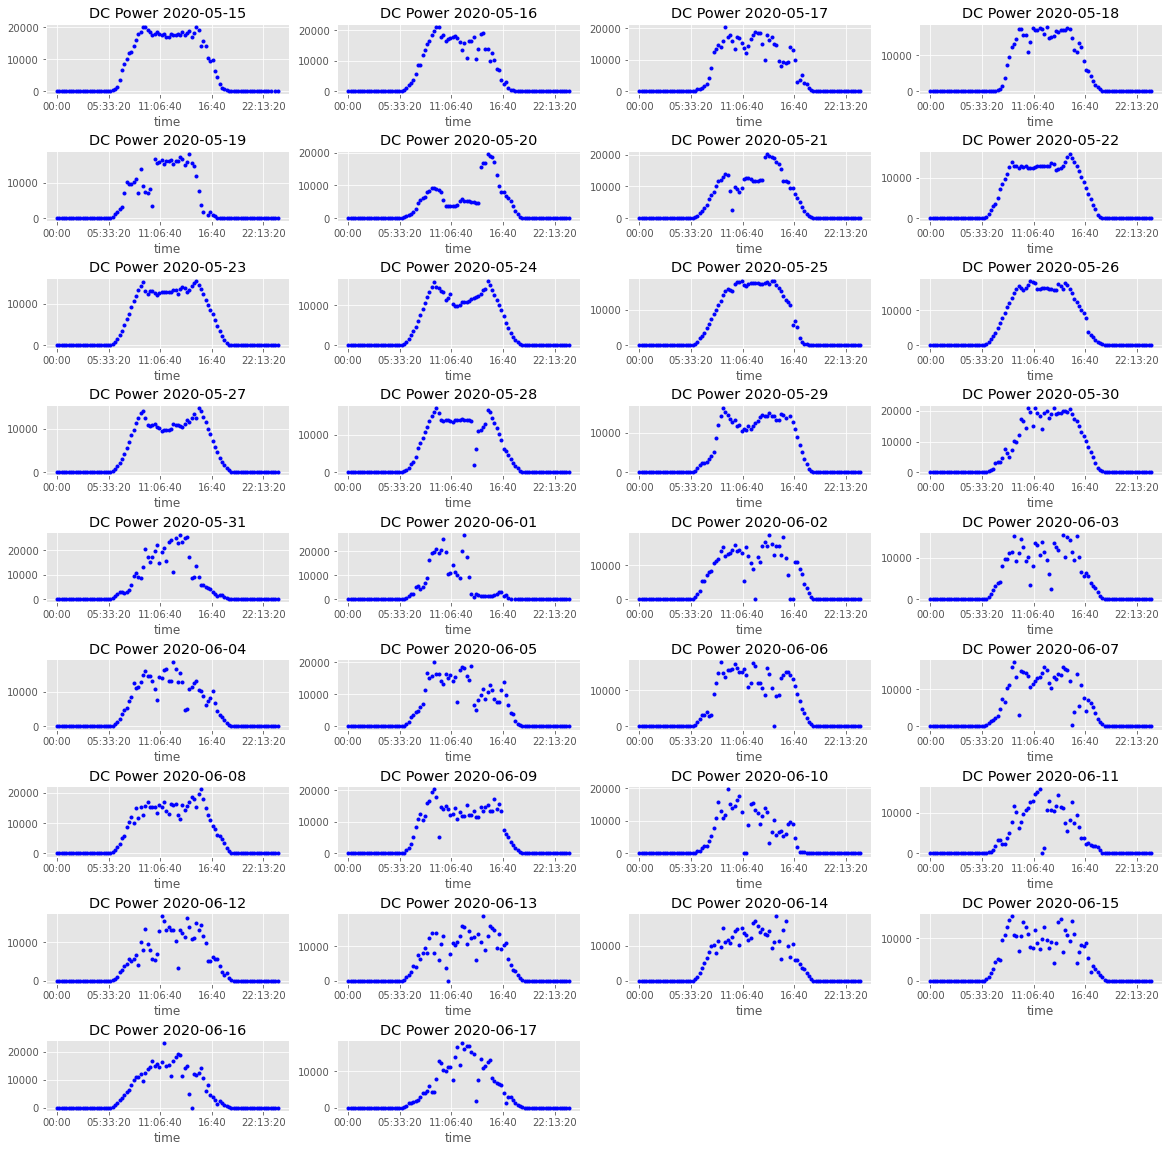

In [16]:
multi_plot(data=calendar_dc, row=9, col=4)

In [17]:
daily_dc = plant2_sum.groupby('date')['DC_POWER'].agg('sum')
daily_dc

date
2020-05-15    666607.630952
2020-05-16    566839.840000
2020-05-17    556236.918205
2020-05-18    530773.677143
2020-05-19    443495.847015
2020-05-20    352374.378810
2020-05-21    494112.260000
2020-05-22    498711.327619
2020-05-23    501823.294762
2020-05-24    479293.537143
2020-05-25    582787.339048
2020-05-26    576620.090952
2020-05-27    445436.748791
2020-05-28    499034.033004
2020-05-29    496059.248581
2020-05-30    614530.604762
2020-05-31    556847.645238
2020-06-01    372058.984597
2020-06-02    519491.964762
2020-06-03    414845.166190
2020-06-04    474970.407143
2020-06-05    518707.514762
2020-06-06    527117.054762
2020-06-07    473278.931905
2020-06-08    604333.864652
2020-06-09    554027.089048
2020-06-10    393589.770390
2020-06-11    342752.854139
2020-06-12    411233.862857
2020-06-13    455305.790476
2020-06-14    505911.451905
2020-06-15    410998.909524
2020-06-16    480810.068571
2020-06-17    380211.240476
Name: DC_POWER, dtype: float64

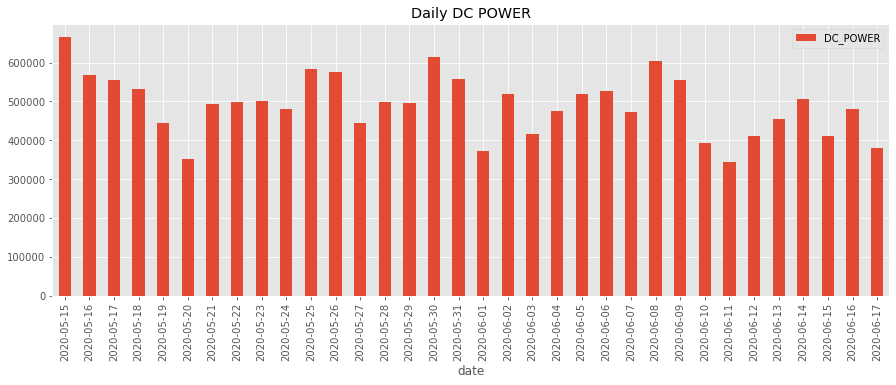

In [18]:
daily_dc.plot.bar(figsize=(15, 5), legend=True)
plt.title('Daily DC POWER')
plt.show()

### Daily Yield

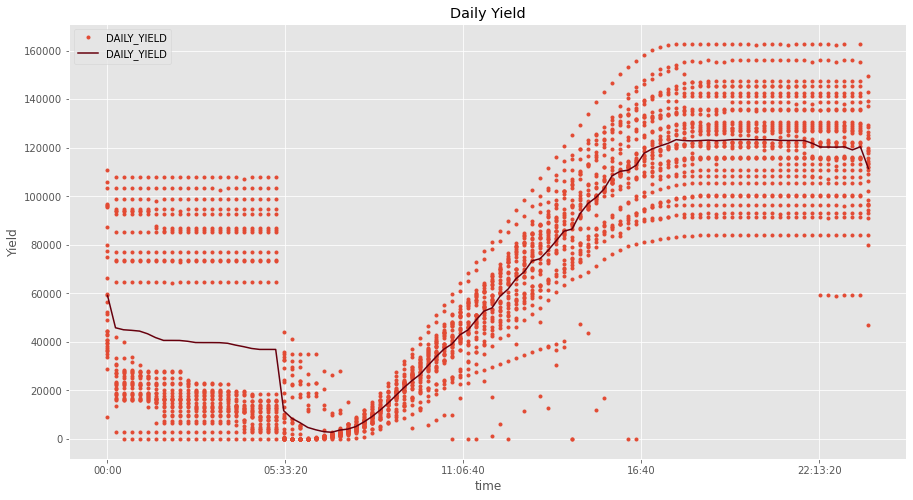

In [19]:
plant2_sum.plot(x='time', y='DAILY_YIELD', style='.', figsize=(15, 8))
plant2_sum.groupby('time')['DAILY_YIELD'].agg(
    'mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('Yield')
plt.title('Daily Yield')
plt.show()

In [20]:
daily_yield = plant2_sum.pivot_table(
    values='DAILY_YIELD', index='time', columns='date')
daily_yield

date,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,...,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,48899.938095,51525.266667,40881.933333,40793.828571,39738.800000,9272.147619,28723.933333,37515.228571,44383.023810,36423.214286,...,96799.585714,110856.000000,105992.771429,74919.533333,66372.828571,79756.190476,87361.933333,95945.6,77490.785714,36866.533333
00:15:00,28401.000000,27001.000000,23297.000000,22704.000000,22285.000000,2825.000000,15904.000000,18891.000000,22883.000000,16940.000000,...,94568.000000,107853.000000,103323.000000,73532.000000,64494.000000,77171.000000,85459.000000,92668.0,73875.000000,13423.466667
00:30:00,28401.000000,27001.000000,23297.000000,22704.000000,22285.000000,2825.000000,15904.000000,18891.000000,22883.000000,16940.000000,...,94568.000000,107853.000000,103323.000000,73201.600000,64494.000000,77171.000000,85459.000000,92668.0,73875.000000,0.000000
00:45:00,28401.000000,27001.000000,23297.000000,22704.000000,22285.000000,2825.000000,15904.000000,18891.000000,22883.000000,16940.000000,...,94568.000000,107853.000000,103323.000000,73532.000000,64494.000000,77171.000000,85227.533333,92668.0,73875.000000,0.000000
01:00:00,26516.000000,26160.800000,22161.600000,22704.000000,22285.000000,2825.000000,15904.000000,18891.000000,22883.000000,16940.000000,...,94568.000000,107853.000000,103323.000000,73532.000000,64494.000000,77171.000000,85459.000000,92668.0,73875.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,162402.933333,138716.000000,135962.000000,129832.000000,59009.733333,108033.000000,122074.000000,120673.000000,130481.000000,112626.071429,...,147699.000000,135566.000000,96297.000000,83974.000000,100664.000000,110929.000000,122347.000000,100165.0,115759.000000,93040.000000
23:00:00,162876.000000,138192.400000,135962.000000,129551.000000,59143.000000,108033.000000,122074.000000,120673.000000,130481.000000,113275.000000,...,147699.000000,135566.000000,95864.153846,83974.000000,100664.000000,110929.000000,122347.000000,100165.0,115759.000000,93040.000000
23:15:00,NaN,138716.000000,135962.000000,129832.000000,59143.000000,108033.000000,122074.000000,120673.000000,130481.000000,113275.000000,...,147699.000000,135566.000000,96297.000000,83974.000000,100664.000000,110929.000000,122347.000000,100165.0,115759.000000,93040.000000


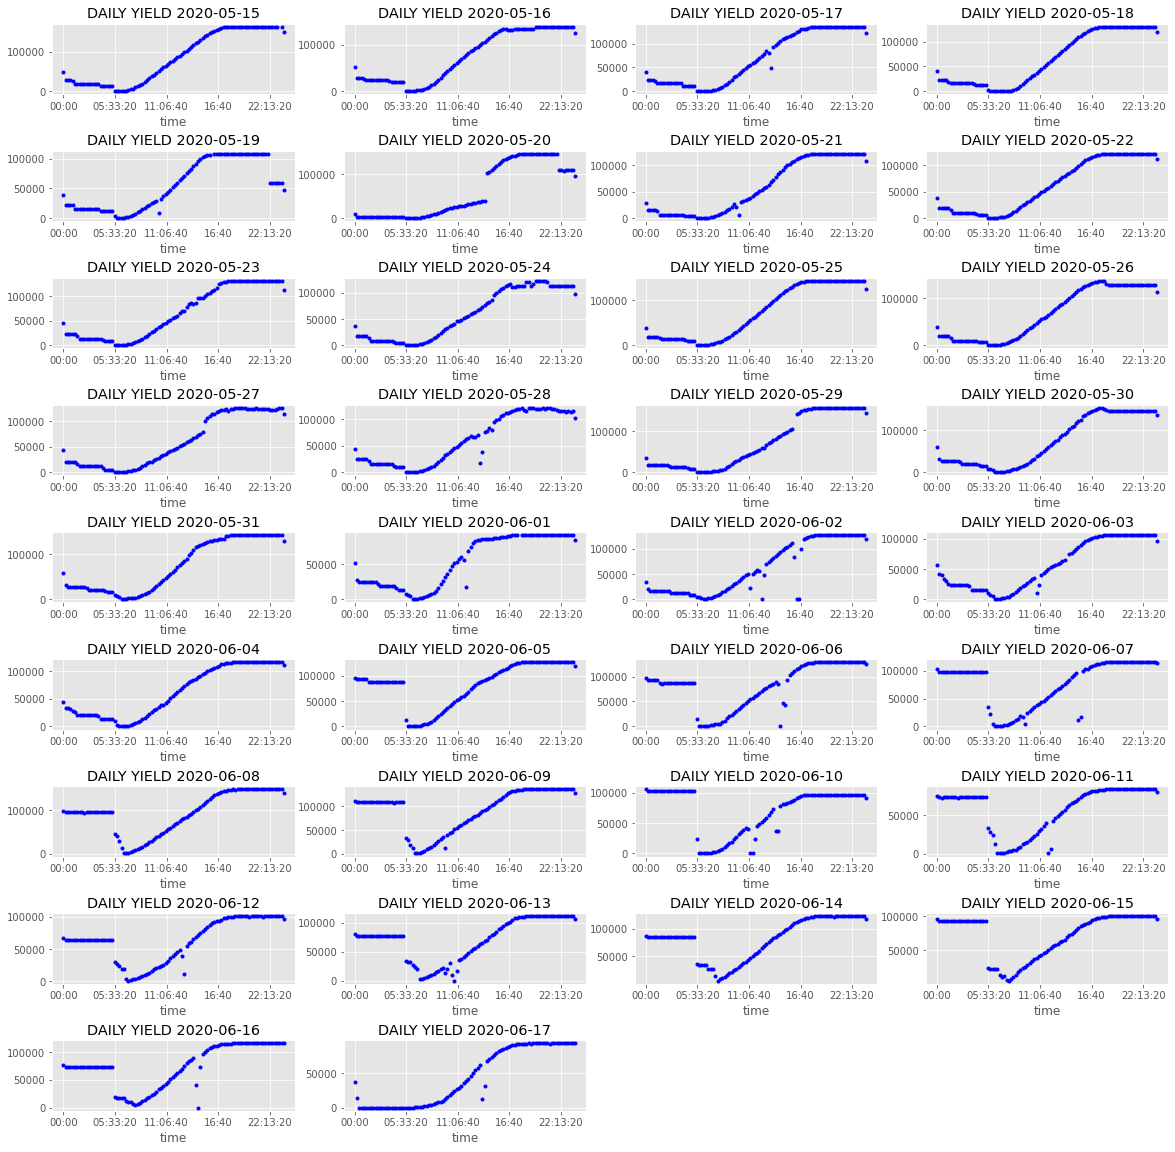

In [21]:
multi_plot(data=daily_yield, row=9, col=4, title='DAILY YIELD')

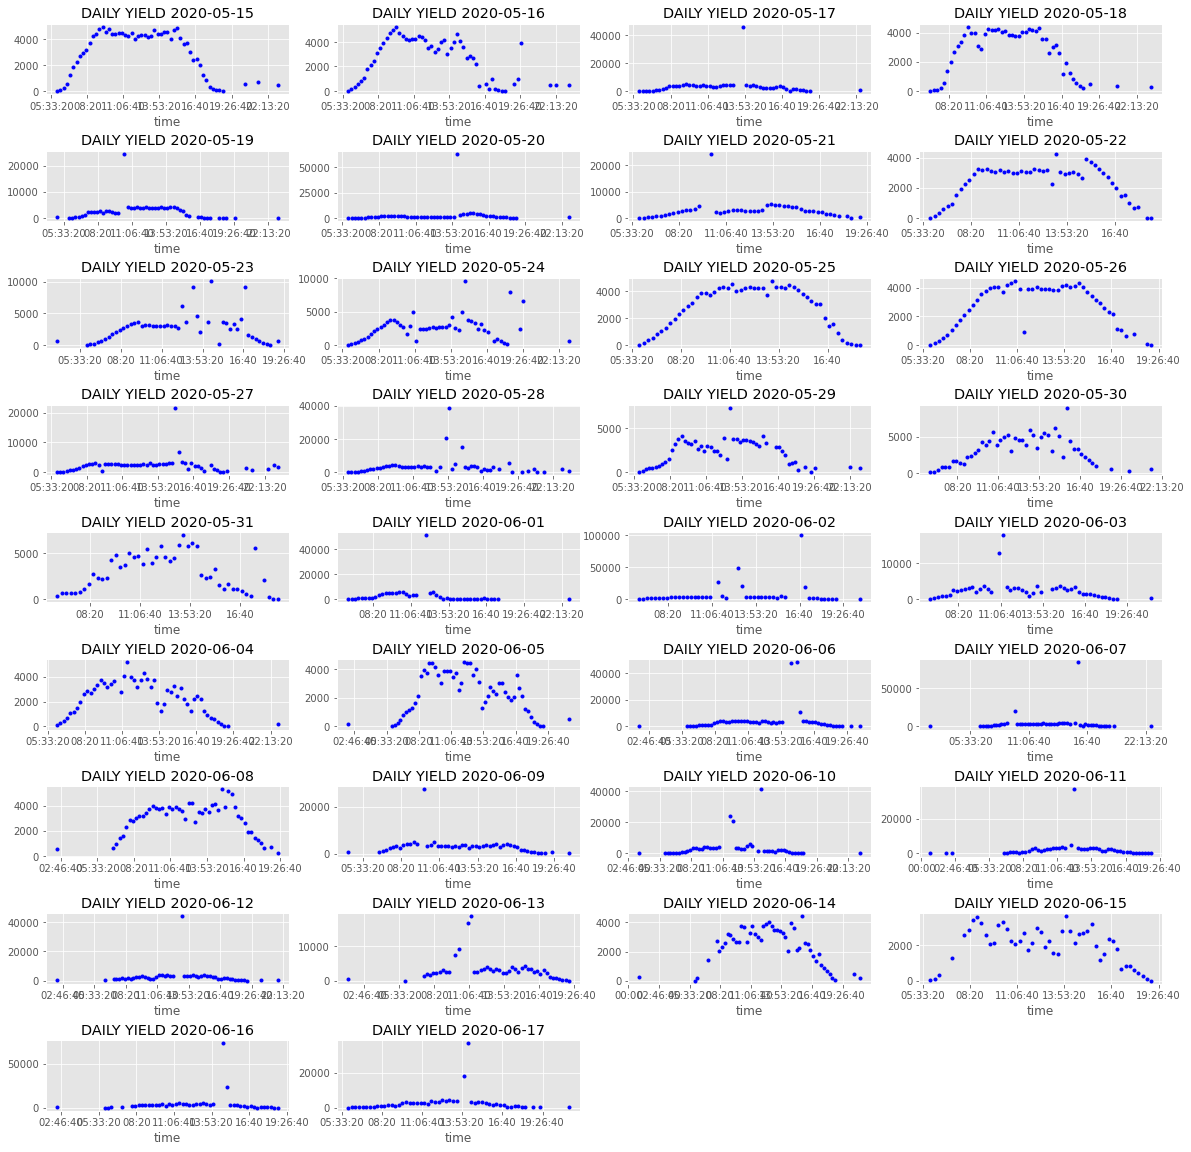

In [22]:
multi_plot(data=daily_yield.diff()[
           daily_yield.diff() > 0], row=9, col=4, title='DAILY YIELD')

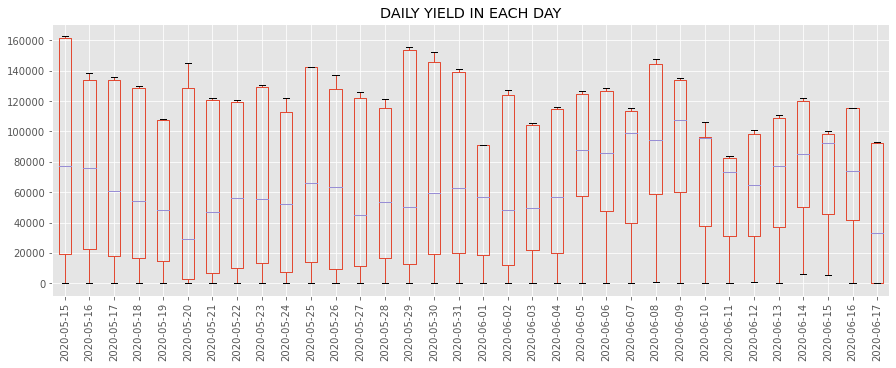

In [23]:
daily_yield.boxplot(figsize=(15, 5), rot=90)
plt.title('DAILY YIELD IN EACH DAY')
plt.show()

In [24]:
daily_yield

date,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,...,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,48899.938095,51525.266667,40881.933333,40793.828571,39738.800000,9272.147619,28723.933333,37515.228571,44383.023810,36423.214286,...,96799.585714,110856.000000,105992.771429,74919.533333,66372.828571,79756.190476,87361.933333,95945.6,77490.785714,36866.533333
00:15:00,28401.000000,27001.000000,23297.000000,22704.000000,22285.000000,2825.000000,15904.000000,18891.000000,22883.000000,16940.000000,...,94568.000000,107853.000000,103323.000000,73532.000000,64494.000000,77171.000000,85459.000000,92668.0,73875.000000,13423.466667
00:30:00,28401.000000,27001.000000,23297.000000,22704.000000,22285.000000,2825.000000,15904.000000,18891.000000,22883.000000,16940.000000,...,94568.000000,107853.000000,103323.000000,73201.600000,64494.000000,77171.000000,85459.000000,92668.0,73875.000000,0.000000
00:45:00,28401.000000,27001.000000,23297.000000,22704.000000,22285.000000,2825.000000,15904.000000,18891.000000,22883.000000,16940.000000,...,94568.000000,107853.000000,103323.000000,73532.000000,64494.000000,77171.000000,85227.533333,92668.0,73875.000000,0.000000
01:00:00,26516.000000,26160.800000,22161.600000,22704.000000,22285.000000,2825.000000,15904.000000,18891.000000,22883.000000,16940.000000,...,94568.000000,107853.000000,103323.000000,73532.000000,64494.000000,77171.000000,85459.000000,92668.0,73875.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,162402.933333,138716.000000,135962.000000,129832.000000,59009.733333,108033.000000,122074.000000,120673.000000,130481.000000,112626.071429,...,147699.000000,135566.000000,96297.000000,83974.000000,100664.000000,110929.000000,122347.000000,100165.0,115759.000000,93040.000000
23:00:00,162876.000000,138192.400000,135962.000000,129551.000000,59143.000000,108033.000000,122074.000000,120673.000000,130481.000000,113275.000000,...,147699.000000,135566.000000,95864.153846,83974.000000,100664.000000,110929.000000,122347.000000,100165.0,115759.000000,93040.000000
23:15:00,NaN,138716.000000,135962.000000,129832.000000,59143.000000,108033.000000,122074.000000,120673.000000,130481.000000,113275.000000,...,147699.000000,135566.000000,96297.000000,83974.000000,100664.000000,110929.000000,122347.000000,100165.0,115759.000000,93040.000000


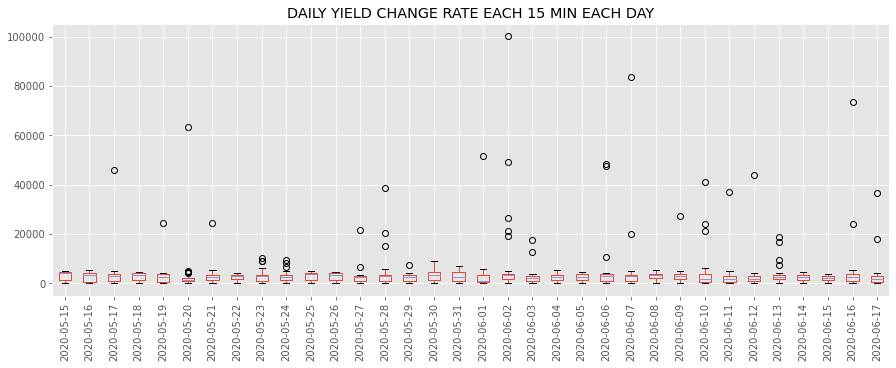

In [25]:
daily_yield.diff()[daily_yield.diff() > 0].boxplot(figsize=(15, 5), rot=90)
plt.title('DAILY YIELD CHANGE RATE EACH 15 MIN EACH DAY')
plt.show()

In [26]:
d_yield = plant2_sum.groupby('date')['DAILY_YIELD'].agg('sum')
d_yield

date
2020-05-15    7.997412e+06
2020-05-16    7.234658e+06
2020-05-17    6.712265e+06
2020-05-18    6.259087e+06
2020-05-19    5.177354e+06
2020-05-20    5.764847e+06
2020-05-21    5.674293e+06
2020-05-22    5.897264e+06
2020-05-23    6.287109e+06
2020-05-24    5.635139e+06
2020-05-25    6.996642e+06
2020-05-26    6.481991e+06
2020-05-27    5.784824e+06
2020-05-28    5.866414e+06
2020-05-29    6.808404e+06
2020-05-30    7.154658e+06
2020-05-31    7.125460e+06
2020-06-01    5.135112e+06
2020-06-02    5.840944e+06
2020-06-03    5.351371e+06
2020-06-04    5.967317e+06
2020-06-05    7.945888e+06
2020-06-06    7.721987e+06
2020-06-07    7.404470e+06
2020-06-08    8.970222e+06
2020-06-09    8.804847e+06
2020-06-10    6.741997e+06
2020-06-11    5.529623e+06
2020-06-12    6.011759e+06
2020-06-13    6.743320e+06
2020-06-14    7.827889e+06
2020-06-15    6.926075e+06
2020-06-16    7.089666e+06
2020-06-17    4.187174e+06
Name: DAILY_YIELD, dtype: float64

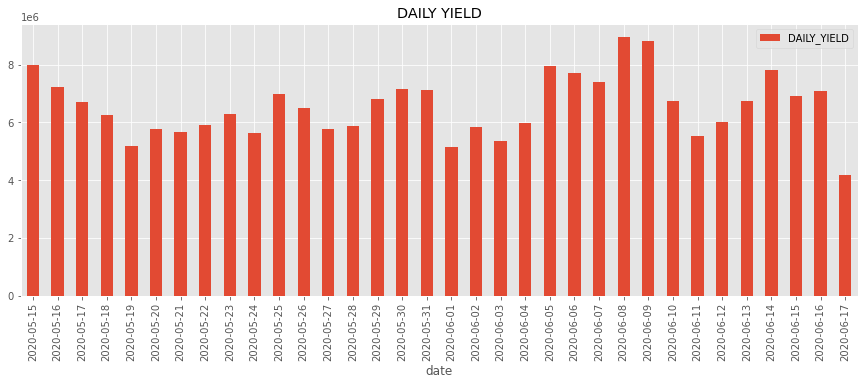

In [27]:
d_yield.plot.bar(figsize=(15, 5), legend=True)
plt.title('DAILY YIELD')
plt.show()

## Plant 2 : Weather Sensor Data

### Ambient Temperature

In [28]:
sensor_plant2 = pd.read_csv(
    'solar_data/Plant_2_Weather_Sensor_Data.csv', low_memory=False)
sensor_plant2

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


In [29]:
sensor_plant2['DATE_TIME'] = pd.to_datetime(sensor_plant2['DATE_TIME'])
sensor_plant2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [30]:
sensor_plant2_sum = sensor_plant2.groupby('DATE_TIME')[
    ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].agg('sum')
sensor_plant2_sum.reset_index(inplace=True)
sensor_plant2_sum['date'] = pd.to_datetime(sensor_plant2['DATE_TIME']).dt.date
sensor_plant2_sum['time'] = pd.to_datetime(sensor_plant2['DATE_TIME']).dt.time
sensor_plant2_sum

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date,time
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,2020-05-15,01:00:00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0,2020-06-17,22:45:00
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0,2020-06-17,23:00:00
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0,2020-06-17,23:15:00
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0,2020-06-17,23:30:00


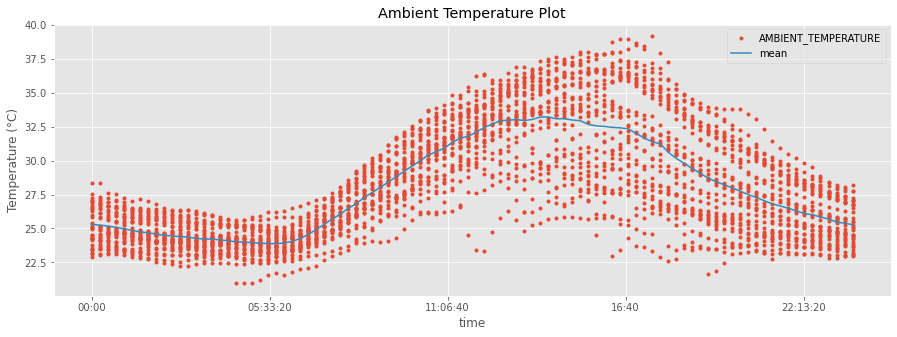

In [31]:
sensor_plant2_sum.plot(x='time', y='AMBIENT_TEMPERATURE',
                       style='.', figsize=(15, 5))
sensor_plant2_sum.groupby('time')['AMBIENT_TEMPERATURE'].agg(
    'mean').plot(legend=True, label='mean')
plt.title('Ambient Temperature Plot')
plt.ylabel('Temperature (°C)')
plt.show()

In [32]:
amb_temp = sensor_plant2_sum.pivot_table(
    values='AMBIENT_TEMPERATURE', index='time', columns='date')
amb_temp

date,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,...,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,27.004764,26.527806,26.290046,23.441600,25.826531,22.869150,25.318035,25.994852,26.720195,26.402938,...,24.993942,25.089851,25.437388,24.528552,23.096334,23.184430,23.775726,24.486876,24.232802,24.149389
00:15:00,26.880811,26.687313,26.148866,23.881824,25.762284,23.504385,25.137857,25.838281,26.455688,26.133398,...,24.852965,24.916420,25.213146,24.602479,23.073426,23.150216,23.729995,24.509378,24.267906,24.140737
00:30:00,26.682055,26.633028,25.883551,24.515678,25.661358,24.692404,24.896141,25.670603,26.211620,25.986046,...,24.749432,24.668885,25.121663,24.652273,23.198418,23.112692,23.651972,24.605338,24.174092,24.054857
00:45:00,26.500589,26.676576,25.906168,25.033410,25.584366,24.773829,24.814706,25.446779,26.107979,25.982041,...,24.582116,24.471559,25.015256,24.744776,23.259188,23.082374,23.772842,24.679791,24.000779,24.007380
01:00:00,26.596148,26.440456,25.762797,25.385702,25.538236,24.617744,24.723783,25.227822,25.871246,25.891755,...,24.471459,24.273839,24.992610,24.655354,23.268280,23.006015,24.106607,24.636373,23.928122,23.982121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,28.145527,28.208467,26.279789,25.952140,23.983648,26.070780,26.771572,27.973988,27.379571,27.577944,...,26.134916,26.059422,24.871220,23.090081,23.006417,24.393407,24.185657,24.610457,23.629430,23.511703
23:00:00,27.709494,27.528521,26.047403,25.955107,23.764135,25.792108,26.574942,27.658895,27.424536,27.270795,...,25.892039,25.908470,24.796323,23.077111,22.828864,24.254086,24.412542,24.623877,23.707057,23.482282
23:15:00,NaN,27.132864,25.518677,25.841874,23.484847,25.699778,26.402471,27.417019,27.187056,27.093005,...,25.684399,25.759716,24.765796,23.062494,22.808353,24.077485,24.652915,24.478888,23.738335,23.354743


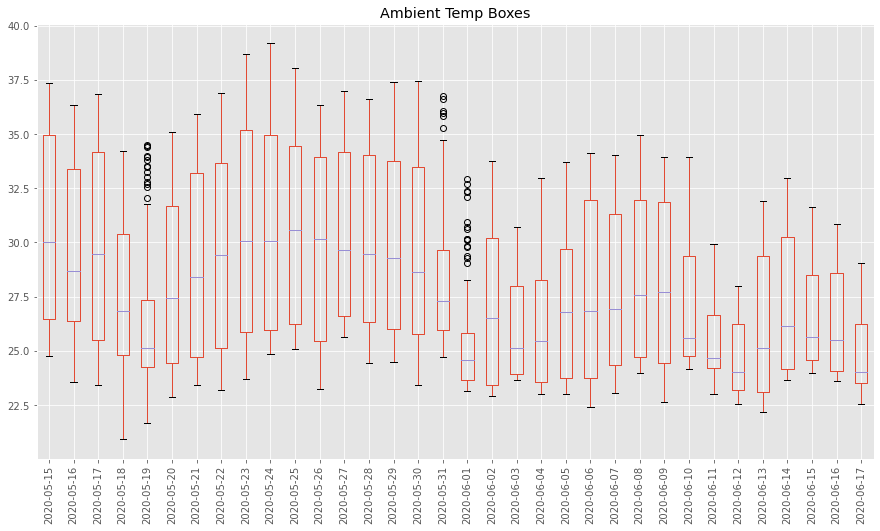

In [33]:
amb_temp.boxplot(rot=90, figsize=(15, 8))
plt.title('Ambient Temp Boxes')
plt.show()

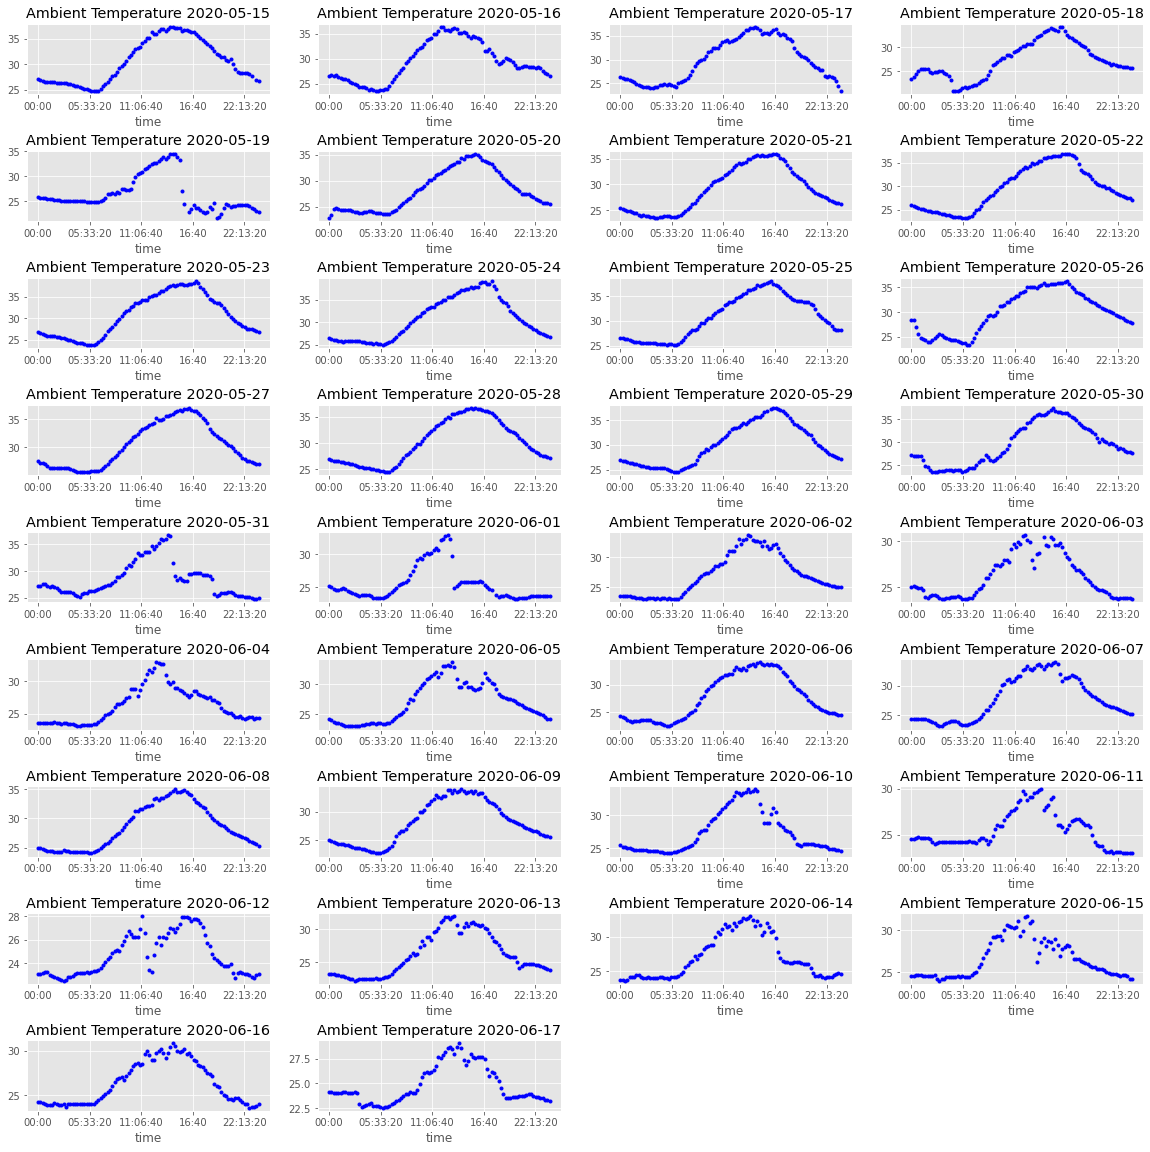

In [34]:
multi_plot(data=amb_temp, row=9, col=4, title='Ambient Temperature')

In [35]:
amb_temp_mean = sensor_plant2_sum.groupby(
    'date')['AMBIENT_TEMPERATURE'].agg('mean')
amb_temp_mean

date
2020-05-15    30.565992
2020-05-16    29.478612
2020-05-17    29.780109
2020-05-18    27.336694
2020-05-19    26.500659
2020-05-20    28.233016
2020-05-21    29.055461
2020-05-22    29.648566
2020-05-23    30.649599
2020-05-24    30.805943
2020-05-25    30.818429
2020-05-26    30.027993
2020-05-27    30.400938
2020-05-28    30.130057
2020-05-29    30.047376
2020-05-30    29.548670
2020-05-31    28.451277
2020-06-01    25.507045
2020-06-02    27.102405
2020-06-03    26.134206
2020-06-04    26.304939
2020-06-05    27.082355
2020-06-06    27.801298
2020-06-07    27.855764
2020-06-08    28.493347
2020-06-09    28.126932
2020-06-10    27.334611
2020-06-11    25.520911
2020-06-12    24.683422
2020-06-13    26.116937
2020-06-14    27.019790
2020-06-15    26.557591
2020-06-16    26.369897
2020-06-17    24.852174
Name: AMBIENT_TEMPERATURE, dtype: float64

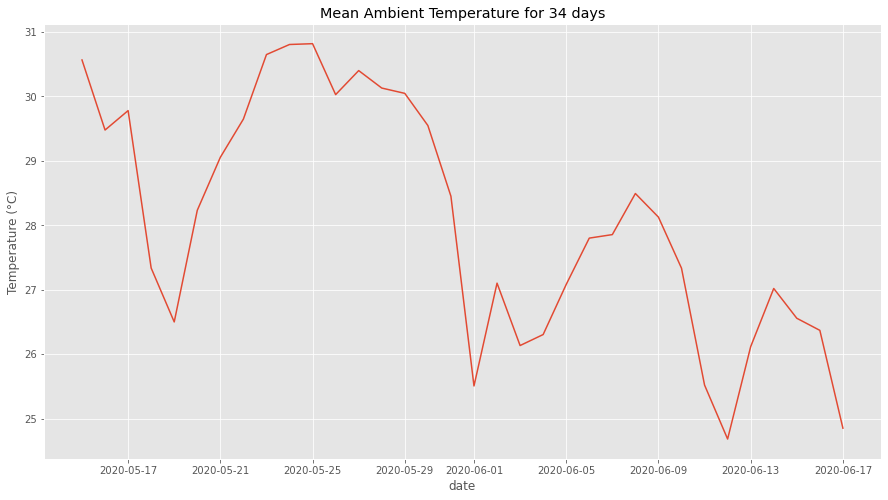

In [36]:
amb_temp_mean.plot(figsize=(15, 8))
plt.title('Mean Ambient Temperature for 34 days')
plt.ylabel('Temperature (°C)')
plt.show()

In [37]:
am_temp_change = (amb_temp_mean.diff()/amb_temp_mean)*100
am_temp_change

date
2020-05-15          NaN
2020-05-16    -3.688709
2020-05-17     1.012412
2020-05-18    -8.938226
2020-05-19    -3.154770
2020-05-20     6.135926
2020-05-21     2.830603
2020-05-22     2.000452
2020-05-23     3.266056
2020-05-24     0.507513
2020-05-25     0.040513
2020-05-26    -2.632329
2020-05-27     1.226753
2020-05-28    -0.899037
2020-05-29    -0.275169
2020-05-30    -1.687743
2020-05-31    -3.857099
2020-06-01   -11.542818
2020-06-02     5.886417
2020-06-03    -3.704722
2020-06-04     0.649055
2020-06-05     2.870562
2020-06-06     2.586005
2020-06-07     0.195527
2020-06-08     2.237657
2020-06-09    -1.302721
2020-06-10    -2.898597
2020-06-11    -7.106723
2020-06-12    -3.392923
2020-06-13     5.488835
2020-06-14     3.341451
2020-06-15    -1.740365
2020-06-16    -0.711774
2020-06-17    -6.107002
Name: AMBIENT_TEMPERATURE, dtype: float64

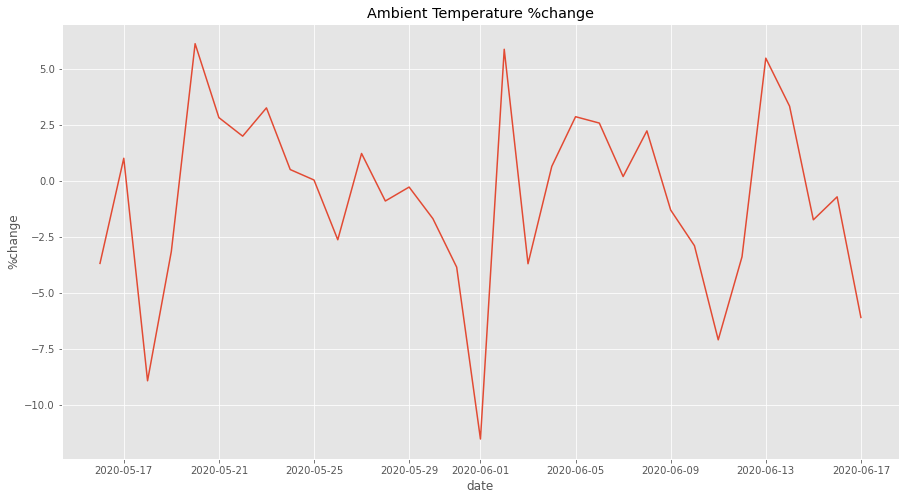

In [38]:
am_temp_change.plot(figsize=(15, 8))
plt.title('Ambient Temperature %change')
plt.ylabel('%change')
plt.show()

### Module Temperature

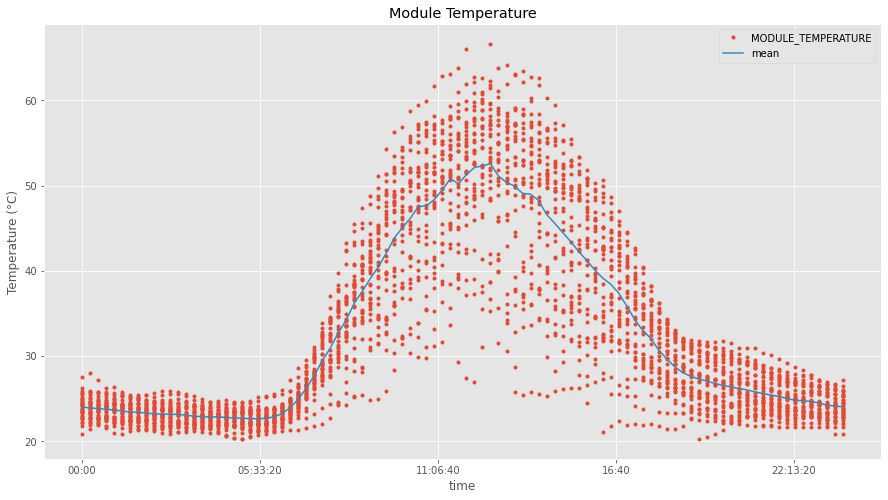

In [39]:
sensor_plant2_sum.plot(x='time', y='MODULE_TEMPERATURE',
                       style='.', figsize=(15, 8))
sensor_plant2_sum.groupby('time')['MODULE_TEMPERATURE'].agg(
    'mean').plot(legend=True, label='mean')
plt.title('Module Temperature')
plt.ylabel('Temperature (°C)')
plt.show()

In [40]:
mod_temp = sensor_plant2_sum.pivot_table(
    values='MODULE_TEMPERATURE', index='time', columns='date')
mod_temp

date,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,...,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,25.060789,24.433264,25.420961,23.655607,24.660962,20.881450,23.365839,24.166762,24.937932,24.869212,...,23.465606,23.415273,24.202458,23.398515,21.819370,22.943785,22.117714,23.846251,23.007219,23.853163
00:15:00,24.421869,24.529142,25.074881,23.599562,24.583376,21.389197,23.122347,23.994546,24.550320,24.372671,...,23.282043,23.182842,23.828037,23.422334,21.868107,22.906561,22.241563,23.902851,23.389545,23.967333
00:30:00,24.427290,24.688451,24.725846,23.709773,24.373651,22.599083,22.891415,24.014673,24.194504,23.951500,...,23.031025,22.861546,23.604673,23.678431,21.921284,22.756978,22.278455,24.172737,23.475119,23.861644
00:45:00,24.420678,24.880440,24.595491,23.981148,24.250307,23.075260,22.888991,23.895894,24.099270,23.871917,...,22.699347,22.493646,23.578188,24.167458,21.790160,22.745495,22.823528,24.459142,22.975047,23.760921
01:00:00,25.088210,24.553809,24.348200,24.332798,24.188483,22.887773,22.647267,23.655808,23.856407,23.897859,...,22.484647,22.197233,23.738608,23.660657,22.156883,22.405011,23.547767,24.380419,22.843167,23.714479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,26.789835,27.788521,25.810258,24.654016,22.873687,24.296769,24.670349,25.814186,25.467832,26.069362,...,24.625021,24.828207,23.496776,21.662188,22.191467,23.194318,22.922953,24.226723,23.118030,22.856201
23:00:00,26.529795,27.186144,25.582710,24.724001,22.499026,23.759390,24.570593,25.563916,25.866147,25.918397,...,24.418501,24.625862,23.435266,21.622833,22.176015,22.898699,23.356136,24.299733,22.795114,22.744190
23:15:00,NaN,26.697985,25.402042,24.602925,21.763375,23.434327,24.377122,25.288167,25.807518,25.684797,...,24.094589,24.364314,23.433154,21.668886,22.152892,22.555913,23.913763,24.096638,22.686434,22.492245


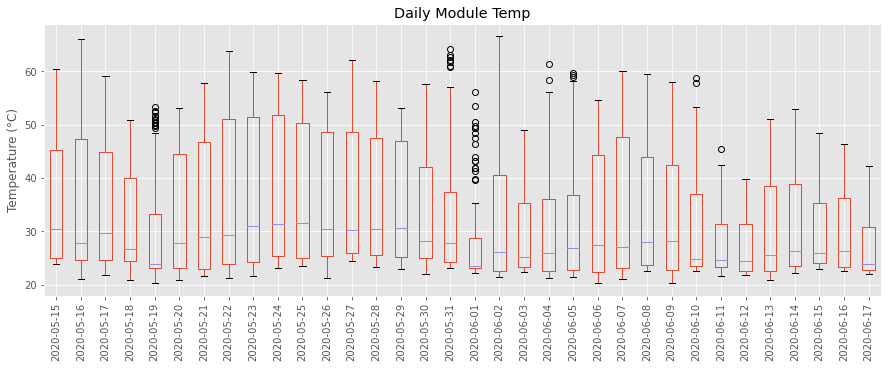

In [41]:
mod_temp.boxplot(figsize=(15, 5), rot=90)
plt.title('Daily Module Temp')
plt.ylabel('Temperature (°C)')
plt.show()

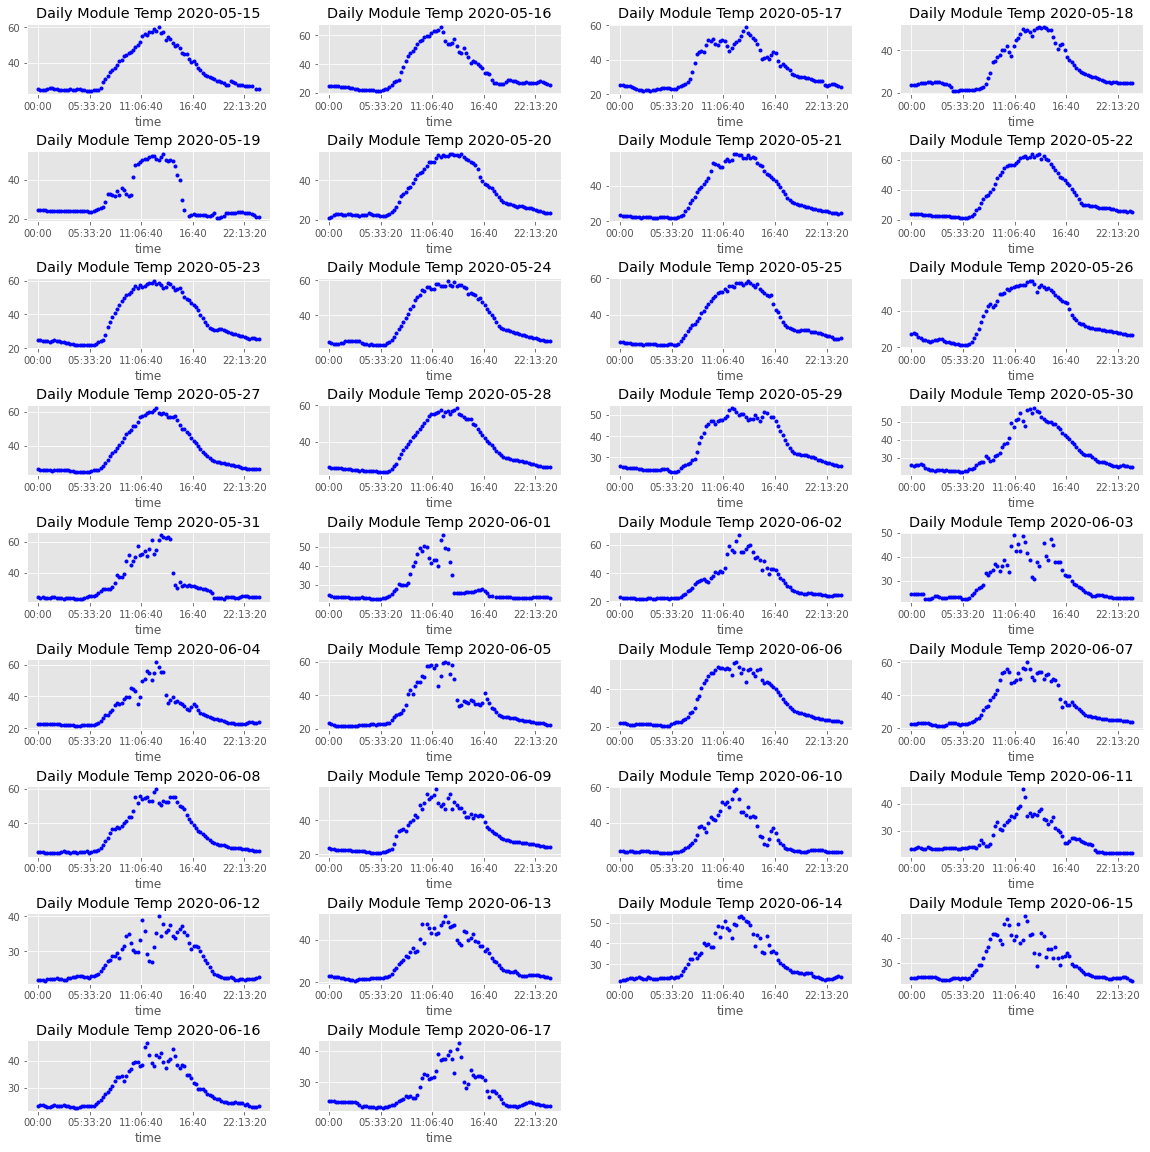

In [42]:
multi_plot(data=mod_temp, row=9, col=4, title='Daily Module Temp')

In [43]:
mod_temp_mean = sensor_plant2_sum.groupby(
    'date')['MODULE_TEMPERATURE'].agg('mean')
mod_temp_mean.index

Index([2020-05-15, 2020-05-16, 2020-05-17, 2020-05-18, 2020-05-19, 2020-05-20,
       2020-05-21, 2020-05-22, 2020-05-23, 2020-05-24, 2020-05-25, 2020-05-26,
       2020-05-27, 2020-05-28, 2020-05-29, 2020-05-30, 2020-05-31, 2020-06-01,
       2020-06-02, 2020-06-03, 2020-06-04, 2020-06-05, 2020-06-06, 2020-06-07,
       2020-06-08, 2020-06-09, 2020-06-10, 2020-06-11, 2020-06-12, 2020-06-13,
       2020-06-14, 2020-06-15, 2020-06-16, 2020-06-17],
      dtype='object', name='date')

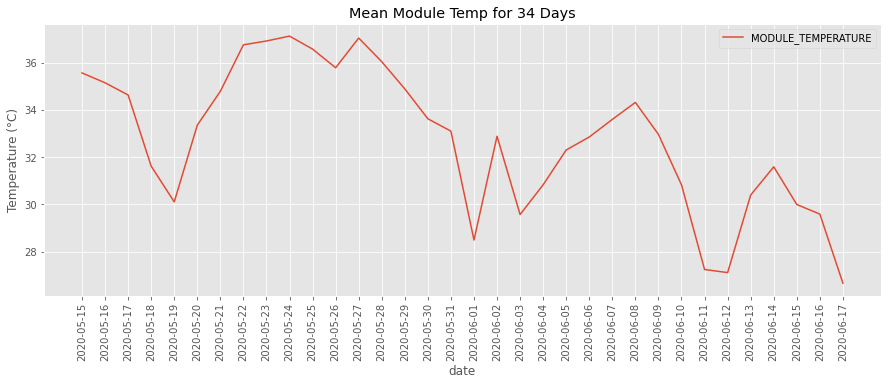

In [44]:
mod_temp_mean.plot(legend=True, figsize=(15, 5), rot=90)
plt.title('Mean Module Temp for 34 Days')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=mod_temp_mean.index)
plt.show()

In [45]:
mod_temp_change = (mod_temp_mean.diff()/mod_temp_mean)*100
mod_temp_change

date
2020-05-15          NaN
2020-05-16    -1.184234
2020-05-17    -1.491862
2020-05-18    -9.515572
2020-05-19    -5.022259
2020-05-20     9.726514
2020-05-21     4.119665
2020-05-22     5.347920
2020-05-23     0.438625
2020-05-24     0.556628
2020-05-25    -1.502748
2020-05-26    -2.202759
2020-05-27     3.390266
2020-05-28    -2.777300
2020-05-29    -3.296263
2020-05-30    -3.757579
2020-05-31    -1.579329
2020-06-01   -16.158113
2020-06-02    13.348553
2020-06-03   -11.195417
2020-06-04     4.081306
2020-06-05     4.550482
2020-06-06     1.675015
2020-06-07     2.214103
2020-06-08     2.091284
2020-06-09    -4.101349
2020-06-10    -6.922198
2020-06-11   -13.131790
2020-06-12    -0.484640
2020-06-13    10.784620
2020-06-14     3.782745
2020-06-15    -5.312672
2020-06-16    -1.373228
2020-06-17   -10.953935
Name: MODULE_TEMPERATURE, dtype: float64

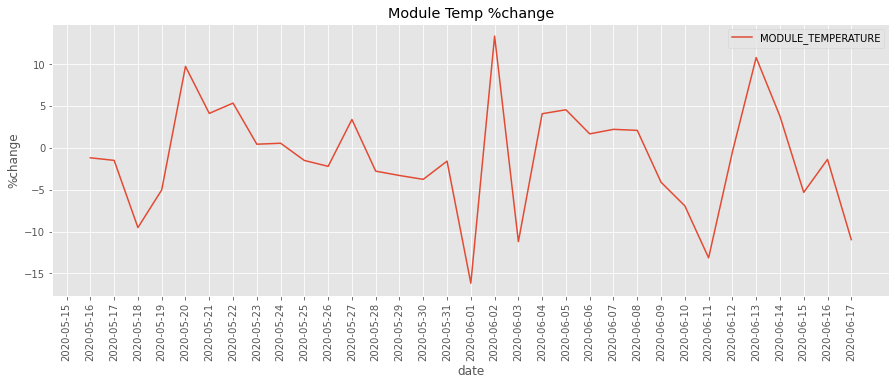

In [46]:
mod_temp_change.plot(legend=True, figsize=(15, 5), rot=90)
plt.title('Module Temp %change')
plt.ylabel('%change')
plt.xticks(ticks=mod_temp_mean.index)
plt.show()

### Irradiation

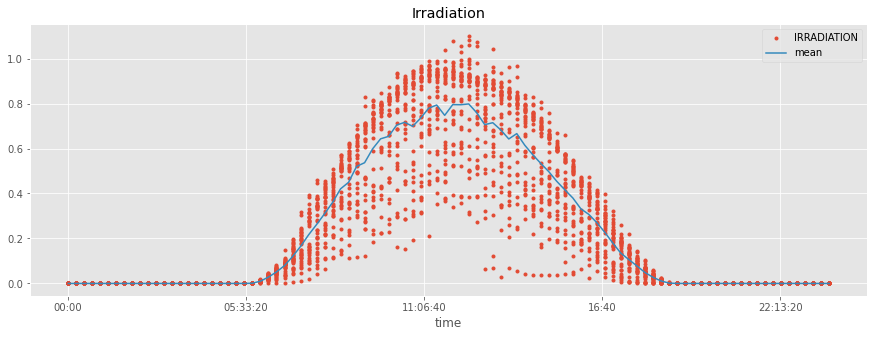

In [47]:
sensor_plant2_sum.plot(x='time', y='IRRADIATION', style='.', figsize=(15, 5))
sensor_plant2_sum.groupby('time')['IRRADIATION'].agg(
    'mean').plot(legend=True, label='mean')
plt.title('Irradiation')
plt.show()

In [48]:
irradiation = sensor_plant2_sum.pivot_table(
    values='IRRADIATION', index='time', columns='date')
irradiation

date,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,...,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000024
00:15:00,0.0,0.0,0.000000,0.0,0.0,0.000028,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
00:30:00,0.0,0.0,0.000000,0.0,0.0,0.000142,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
00:45:00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000078,0.0,0.000000,0.000000
01:00:00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000106,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,0.0,0.0,0.001039,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
23:00:00,0.0,0.0,0.000746,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
23:15:00,NaN,0.0,0.000143,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


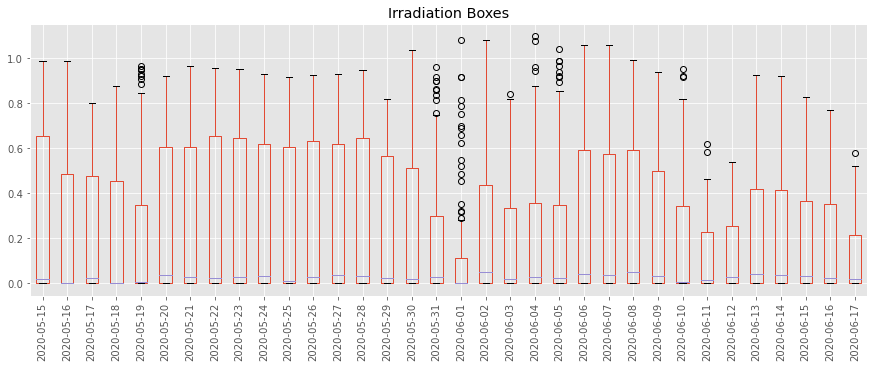

In [49]:
irradiation.boxplot(figsize=(15, 5), rot=90)
plt.title('Irradiation Boxes')
plt.show()

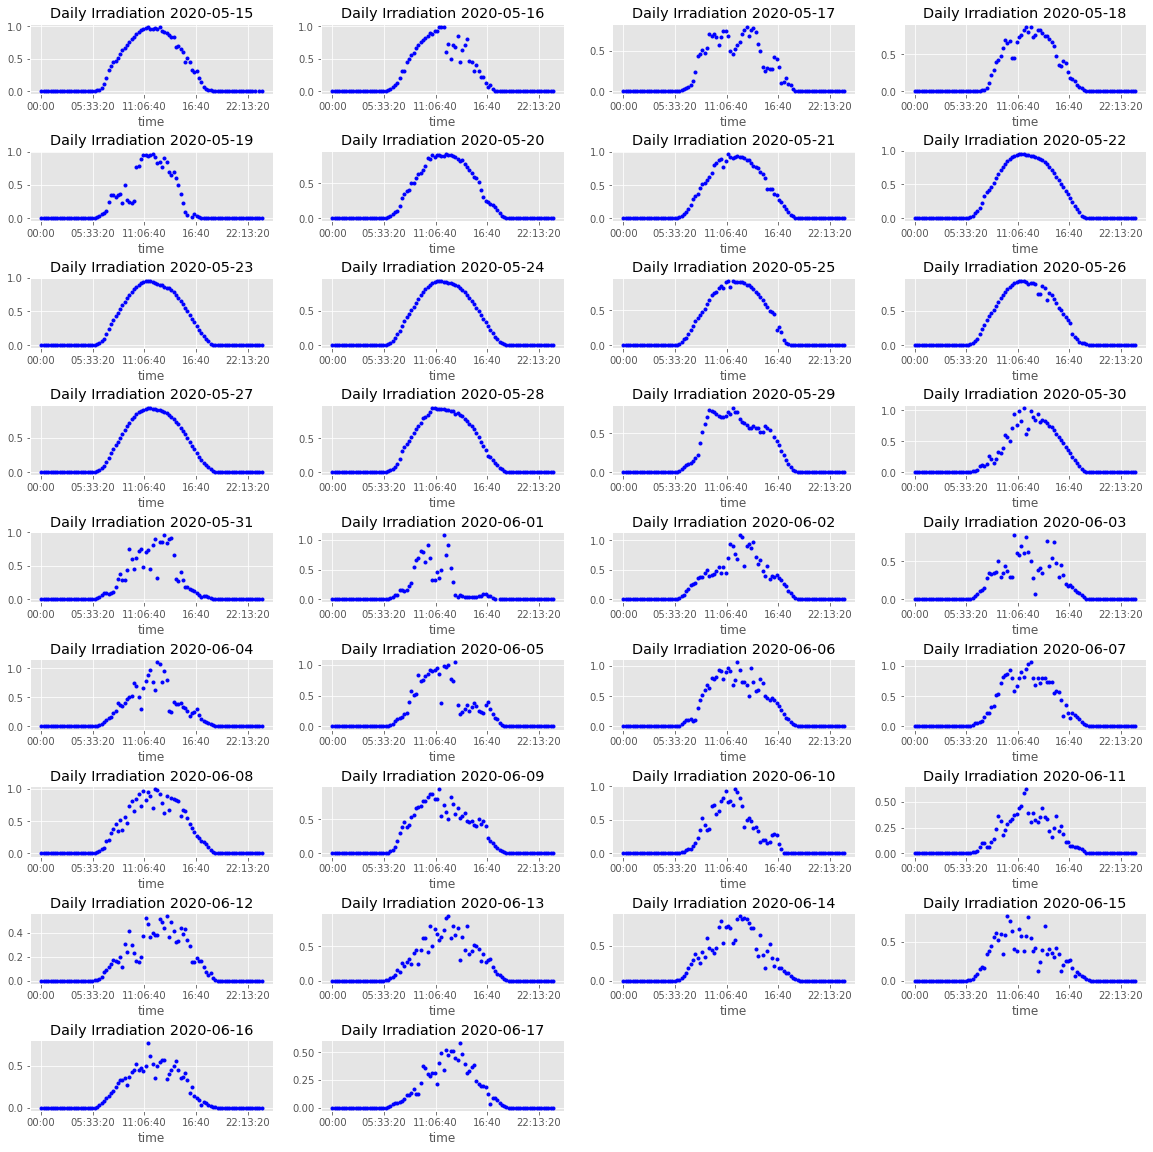

In [50]:
multi_plot(data=irradiation, row=9, col=4, title='Daily Irradiation')

In [51]:
irr_sum = sensor_plant2_sum.groupby('date')['IRRADIATION'].agg('sum')
irr_sum

date
2020-05-15    28.559055
2020-05-16    23.676573
2020-05-17    21.233595
2020-05-18    21.495780
2020-05-19    20.345321
2020-05-20    26.786871
2020-05-21    27.191185
2020-05-22    28.535843
2020-05-23    28.159981
2020-05-24    27.426044
2020-05-25    26.556925
2020-05-26    27.234674
2020-05-27    27.431939
2020-05-28    28.137027
2020-05-29    23.237209
2020-05-30    23.826997
2020-05-31    19.203960
2020-06-01    13.430264
2020-06-02    23.748618
2020-06-03    16.614638
2020-06-04    20.182779
2020-06-05    22.366602
2020-06-06    25.963741
2020-06-07    25.034945
2020-06-08    27.038444
2020-06-09    23.838025
2020-06-10    18.576323
2020-06-11    11.277962
2020-06-12    13.102966
2020-06-13    20.690174
2020-06-14    22.033630
2020-06-15    17.765047
2020-06-16    15.845917
2020-06-17    11.940765
Name: IRRADIATION, dtype: float64

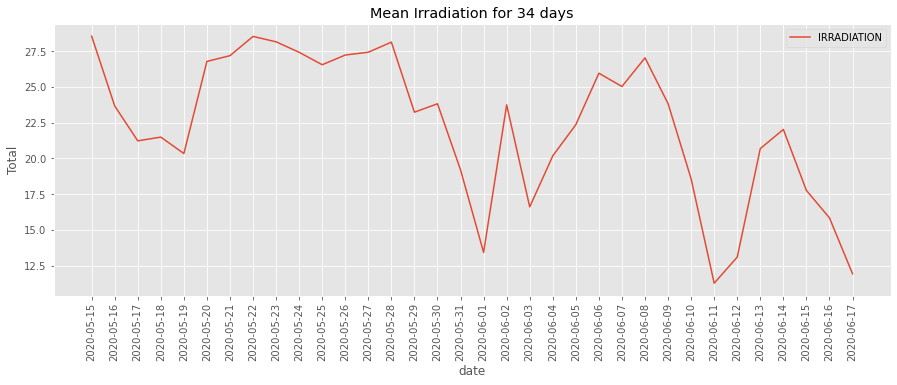

In [52]:
irr_sum.plot(figsize=(15, 5), rot=90, legend=True)
plt.title('Mean Irradiation for 34 days')
plt.xticks(ticks=irr_sum.index)
plt.ylabel('Total')
plt.show()

In [53]:
irr_change = (irr_sum.diff()/irr_sum)*100
irr_change

date
2020-05-15          NaN
2020-05-16   -20.621575
2020-05-17   -11.505248
2020-05-18     1.219706
2020-05-19    -5.654665
2020-05-20    24.047415
2020-05-21     1.486931
2020-05-22     4.712173
2020-05-23    -1.334740
2020-05-24    -2.676056
2020-05-25    -3.272665
2020-05-26     2.488551
2020-05-27     0.719106
2020-05-28     2.505909
2020-05-29   -21.086086
2020-05-30     2.475295
2020-05-31   -24.073354
2020-06-01   -42.990191
2020-06-02    43.448230
2020-06-03   -42.937923
2020-06-04    17.679138
2020-06-05     9.763767
2020-06-06    13.854469
2020-06-07    -3.709998
2020-06-08     7.409817
2020-06-09   -13.425690
2020-06-10   -28.324777
2020-06-11   -64.713470
2020-06-12    13.928172
2020-06-13    36.670586
2020-06-14     6.097301
2020-06-15   -24.027990
2020-06-16   -12.111195
2020-06-17   -32.704370
Name: IRRADIATION, dtype: float64

## Data Correlation

In [54]:
plant2_sum

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time,date
0,0.0,0.0,48899.938095,1.418960e+10,00:00:00,2020-05-15
1,0.0,0.0,28401.000000,1.418960e+10,00:15:00,2020-05-15
2,0.0,0.0,28401.000000,1.418960e+10,00:30:00,2020-05-15
3,0.0,0.0,28401.000000,1.418960e+10,00:45:00,2020-05-15
4,0.0,0.0,26516.000000,1.418960e+10,01:00:00,2020-05-15
...,...,...,...,...,...,...
3254,0.0,0.0,93040.000000,1.419408e+10,22:45:00,2020-06-17
3255,0.0,0.0,93040.000000,1.419408e+10,23:00:00,2020-06-17
3256,0.0,0.0,93040.000000,1.419408e+10,23:15:00,2020-06-17
3257,0.0,0.0,93040.000000,1.419408e+10,23:30:00,2020-06-17


In [55]:
sensor_plant2_sum

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date,time
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,2020-05-15,01:00:00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0,2020-06-17,22:45:00
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0,2020-06-17,23:00:00
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0,2020-06-17,23:15:00
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0,2020-06-17,23:30:00


In [56]:
power_sensor2 = sensor_plant2_sum.merge(plant2_sum)
power_sensor2

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,date,time,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,2020-05-15,00:00:00,0.0,0.0,48899.938095,1.418960e+10
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,2020-05-15,00:15:00,0.0,0.0,28401.000000,1.418960e+10
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,2020-05-15,00:30:00,0.0,0.0,28401.000000,1.418960e+10
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,2020-05-15,00:45:00,0.0,0.0,28401.000000,1.418960e+10
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,2020-05-15,01:00:00,0.0,0.0,26516.000000,1.418960e+10
...,...,...,...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0,2020-06-17,22:45:00,0.0,0.0,93040.000000,1.419408e+10
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0,2020-06-17,23:00:00,0.0,0.0,93040.000000,1.419408e+10
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0,2020-06-17,23:15:00,0.0,0.0,93040.000000,1.419408e+10
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0,2020-06-17,23:30:00,0.0,0.0,93040.000000,1.419408e+10


In [57]:
power_sensor2.drop(columns=['time', 'date'], axis=1, inplace=True)
power_sensor2

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,0.0,0.0,48899.938095,1.418960e+10
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,0.0,0.0,28401.000000,1.418960e+10
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,0.0,0.0,28401.000000,1.418960e+10
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,0.0,0.0,28401.000000,1.418960e+10
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,0.0,0.0,26516.000000,1.418960e+10
...,...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0,0.0,0.0,93040.000000,1.419408e+10
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0,0.0,0.0,93040.000000,1.419408e+10
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0,0.0,0.0,93040.000000,1.419408e+10
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0,0.0,0.0,93040.000000,1.419408e+10


In [58]:
power_sensor2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   AMBIENT_TEMPERATURE  3259 non-null   float64       
 2   MODULE_TEMPERATURE   3259 non-null   float64       
 3   IRRADIATION          3259 non-null   float64       
 4   DC_POWER             3259 non-null   float64       
 5   AC_POWER             3259 non-null   float64       
 6   DAILY_YIELD          3259 non-null   float64       
 7   TOTAL_YIELD          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 229.1 KB


In [59]:
power_sensor2.corr(method='spearman')

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
AMBIENT_TEMPERATURE,1.000000,0.916174,0.663310,0.656094,0.655914,0.378002,-0.345938
MODULE_TEMPERATURE,0.916174,1.000000,0.857441,0.841773,0.841561,0.138166,-0.237157
IRRADIATION,0.663310,0.857441,1.000000,0.955187,0.954972,-0.166321,-0.118445
DC_POWER,0.656094,0.841773,0.955187,1.000000,0.999998,-0.131147,-0.046696
AC_POWER,0.655914,0.841561,0.954972,0.999998,1.000000,-0.131137,-0.046480
DAILY_YIELD,0.378002,0.138166,-0.166321,-0.131147,-0.131137,1.000000,0.111859
TOTAL_YIELD,-0.345938,-0.237157,-0.118445,-0.046696,-0.046480,0.111859,1.000000


In [60]:
import seaborn as sns

In [61]:
corr = power_sensor2.drop(
    columns=['DAILY_YIELD', 'TOTAL_YIELD'], axis=1).corr(method='spearman')
corr

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER
AMBIENT_TEMPERATURE,1.000000,0.916174,0.663310,0.656094,0.655914
MODULE_TEMPERATURE,0.916174,1.000000,0.857441,0.841773,0.841561
IRRADIATION,0.663310,0.857441,1.000000,0.955187,0.954972
DC_POWER,0.656094,0.841773,0.955187,1.000000,0.999998
AC_POWER,0.655914,0.841561,0.954972,0.999998,1.000000


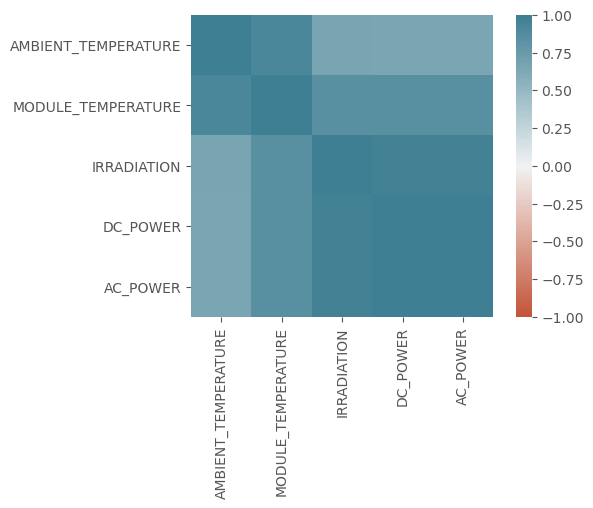

In [62]:
plt.figure(dpi=100)
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
            square=True)
plt.show()

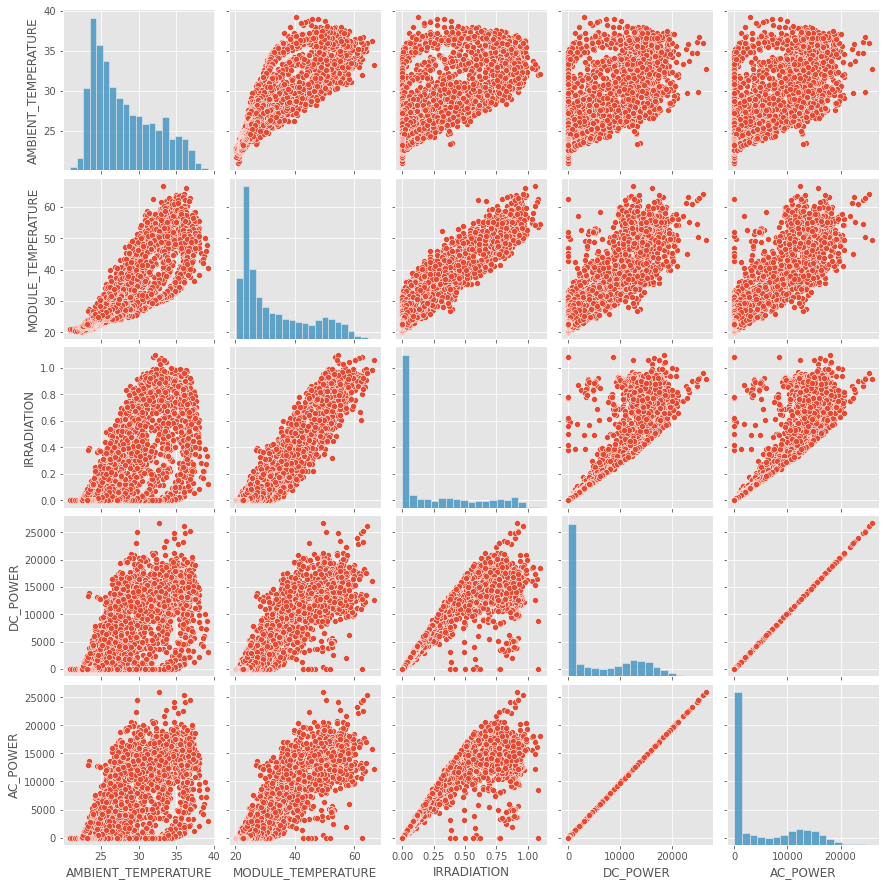

In [63]:
sns.pairplot(power_sensor2.drop(
    columns=['DAILY_YIELD', 'TOTAL_YIELD'], axis=1))
plt.show()

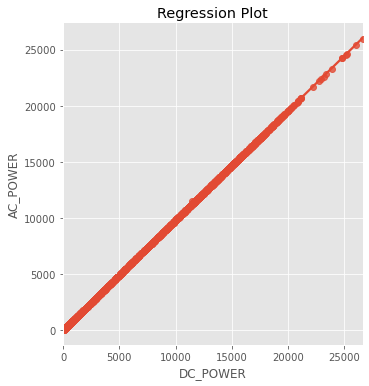

In [64]:
sns.lmplot(x='DC_POWER', y='AC_POWER', data=power_sensor2)
plt.title('Regression Plot')
plt.show()

In [65]:
def power_lmplot(x=None, y=None, Title='Regression Plot'):
    sns.lmplot(x, y, data=power_sensor2)
    plt.title(Title)
    plt.show()

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


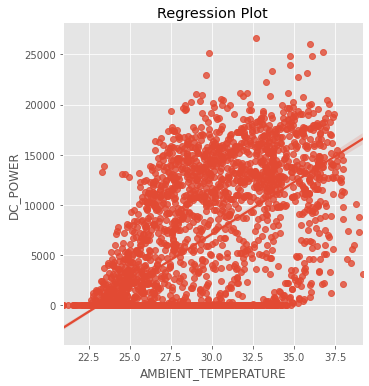

In [66]:
power_lmplot(x='AMBIENT_TEMPERATURE', y='DC_POWER')

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


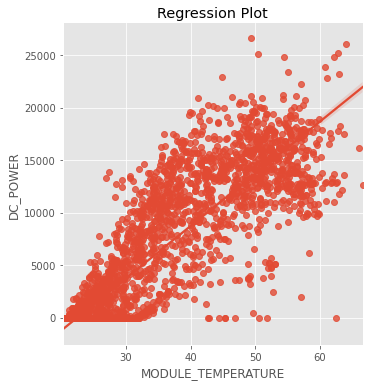

In [67]:
power_lmplot(x='MODULE_TEMPERATURE', y='DC_POWER')

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


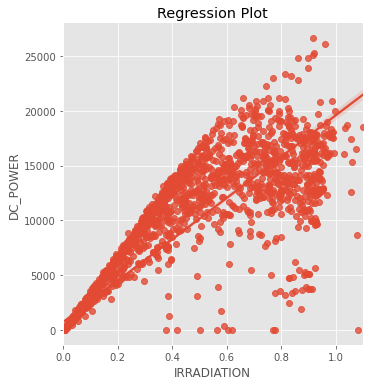

In [68]:
power_lmplot(x='IRRADIATION', y='DC_POWER')

In [69]:
power_sensor2['Delta Temp'] = abs(power_sensor2.MODULE_TEMPERATURE - power_sensor2.AMBIENT_TEMPERATURE)
power_sensor2

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Delta Temp
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,0.0,0.0,48899.938095,1.418960e+10,1.943975
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,0.0,0.0,28401.000000,1.418960e+10,2.458943
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,0.0,0.0,28401.000000,1.418960e+10,2.254765
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,0.0,0.0,28401.000000,1.418960e+10,2.079911
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,0.0,0.0,26516.000000,1.418960e+10,1.507938
...,...,...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0,0.0,0.0,93040.000000,1.419408e+10,0.655502
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0,0.0,0.0,93040.000000,1.419408e+10,0.738092
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0,0.0,0.0,93040.000000,1.419408e+10,0.862497
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0,0.0,0.0,93040.000000,1.419408e+10,0.917140


In [70]:
power_sensor2.corr(method='spearman')

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Delta Temp
AMBIENT_TEMPERATURE,1.000000,0.916174,0.663310,0.656094,0.655914,0.378002,-0.345938,0.672581
MODULE_TEMPERATURE,0.916174,1.000000,0.857441,0.841773,0.841561,0.138166,-0.237157,0.765913
IRRADIATION,0.663310,0.857441,1.000000,0.955187,0.954972,-0.166321,-0.118445,0.785549
DC_POWER,0.656094,0.841773,0.955187,1.000000,0.999998,-0.131147,-0.046696,0.766532
AC_POWER,0.655914,0.841561,0.954972,0.999998,1.000000,-0.131137,-0.046480,0.766327
DAILY_YIELD,0.378002,0.138166,-0.166321,-0.131147,-0.131137,1.000000,0.111859,-0.065252
TOTAL_YIELD,-0.345938,-0.237157,-0.118445,-0.046696,-0.046480,0.111859,1.000000,-0.250147
Delta Temp,0.672581,0.765913,0.785549,0.766532,0.766327,-0.065252,-0.250147,1.000000


In [71]:
corr = power_sensor2.drop(
    columns=['DAILY_YIELD', 'TOTAL_YIELD'], axis=1).corr(method='spearman')
corr

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,Delta Temp
AMBIENT_TEMPERATURE,1.000000,0.916174,0.663310,0.656094,0.655914,0.672581
MODULE_TEMPERATURE,0.916174,1.000000,0.857441,0.841773,0.841561,0.765913
IRRADIATION,0.663310,0.857441,1.000000,0.955187,0.954972,0.785549
DC_POWER,0.656094,0.841773,0.955187,1.000000,0.999998,0.766532
AC_POWER,0.655914,0.841561,0.954972,0.999998,1.000000,0.766327
Delta Temp,0.672581,0.765913,0.785549,0.766532,0.766327,1.000000


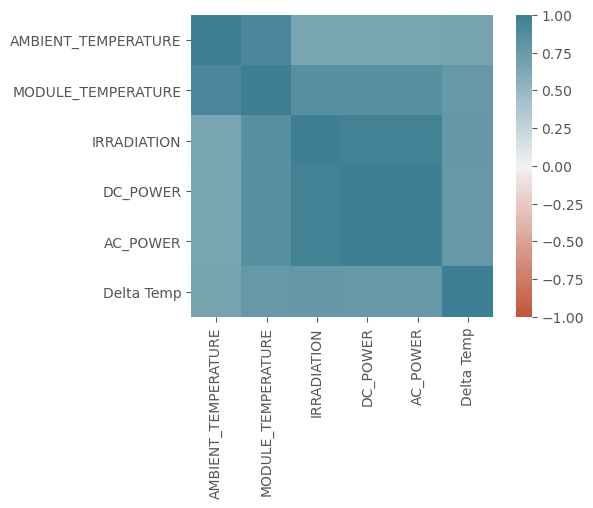

In [72]:
plt.figure(dpi=100)
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.show()

C:\Users\nrpra\ML_project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


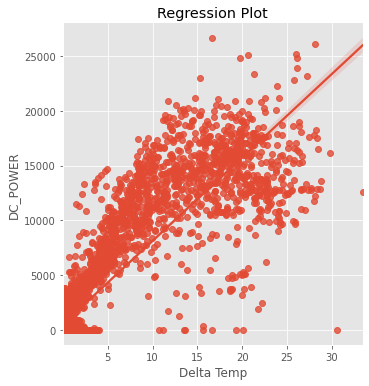

In [73]:
power_lmplot(x='Delta Temp', y='DC_POWER')

In [74]:
# plant2_sum.to_csv(r'Plant2Sum.csv', index=False)